In [1]:
from kaveh.behavioral.oculomotor.session import session
from kaveh.toolbox import find_file
from neo.io import Spike2IO
from matplotlib import pyplot as plt



In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
buckley_files_correct_events = ['B082107_1340_List.smr', #yes
'B090407_1526_List.smr', # yes
'B091208_1545_List.smr', # No done
'B091608_1208_List.smr', # No done
'B091707_1414_List.smr', # No done
'B091908_1_1500_List.smr', # No done
'B091908_2_1550_List.smr', # No done
'B093008_1149_List.smr', # No done
'B100308_2_1403_List.smr', # No done
'B101707_1333_List.smr', # yes
'B121407_1_1124_List.smr', # No done >> tuning doesn't match
'W091008_1241_List.smr', # No done
'W091208_1337_List.smr', # No done: bimodal cs-on
'W120108_1622_List.smr', # Yes --> actually no, the labled cs are nonsense; also weird saccades; needs more filtering
'W120208_1_1418_List.smr', # No done
'W120308_2_1714_List.smr', # Yes
'W120508_1_1420_List.smr', # No done
'W120508_2_1628_List.smr'] # No

f_index = 5
f_name = find_file(buckley_files_correct_events[f_index], '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt')
print(f_name)

/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091908_1/B091908_1_1500_List.smr


In [4]:
neo_reader = Spike2IO(filename=f_name)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]


In [5]:
# Load eye data
HE = seg.analogsignals[0].as_array()
t_HE = seg.analogsignals[0].times;

VE = seg.analogsignals[1].as_array()
t_VE = seg.analogsignals[1].times

HT = seg.analogsignals[2].as_array()
t_HT = seg.analogsignals[2].times

VT = seg.analogsignals[3].as_array()
t_VT = seg.analogsignals[3].times

fs = seg.analogsignals[0].sampling_rate
dt = seg.analogsignals[0].sampling_period


In [6]:
mysess = session(HT, t_HT, VT, t_VT, HE, t_HE, VE, t_VE, fs, dt)

mysess._calc_target_velocity()
mysess._calc_saccade_velocity()


mysess._detect_target_jumps()
mysess._detect_saccades()

/usr/local/lib/python2.7/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


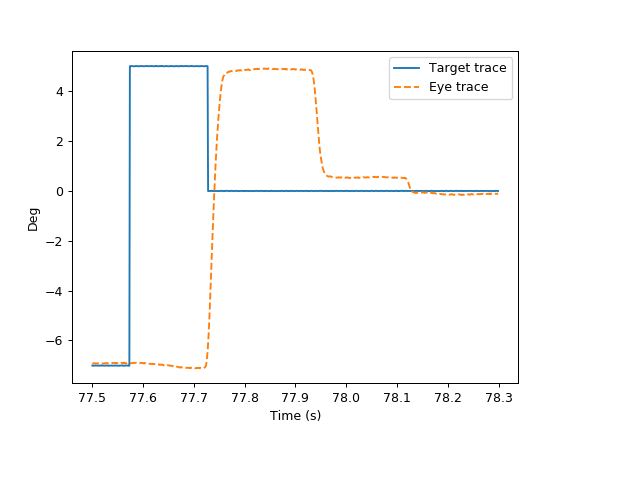

In [9]:
import numpy as np
plt.figure()
t1 = 77.5
t2 = 78.3
plt.plot(t_HT[np.where(np.logical_and(t_HT > t1, t_HT < t2))], HT[np.where(np.logical_and(t_HT > t1, t_HT < t2))])
plt.plot(t_HT[np.where(np.logical_and(t_HT > t1, t_HT < t2))], HE[np.where(np.logical_and(t_HT > t1, t_HT < t2))], '--')
plt.xlabel('Time (s)')
plt.ylabel('Deg')
plt.legend(['Target trace', 'Eye trace'])

In [10]:
plt.savefig('../data/plots/Saliency_stuff/eye_target_trace.svg')
plt.savefig('../data/plots/Saliency_stuff/eye_target_trace.png')

<IPython.core.display.Javascript object>


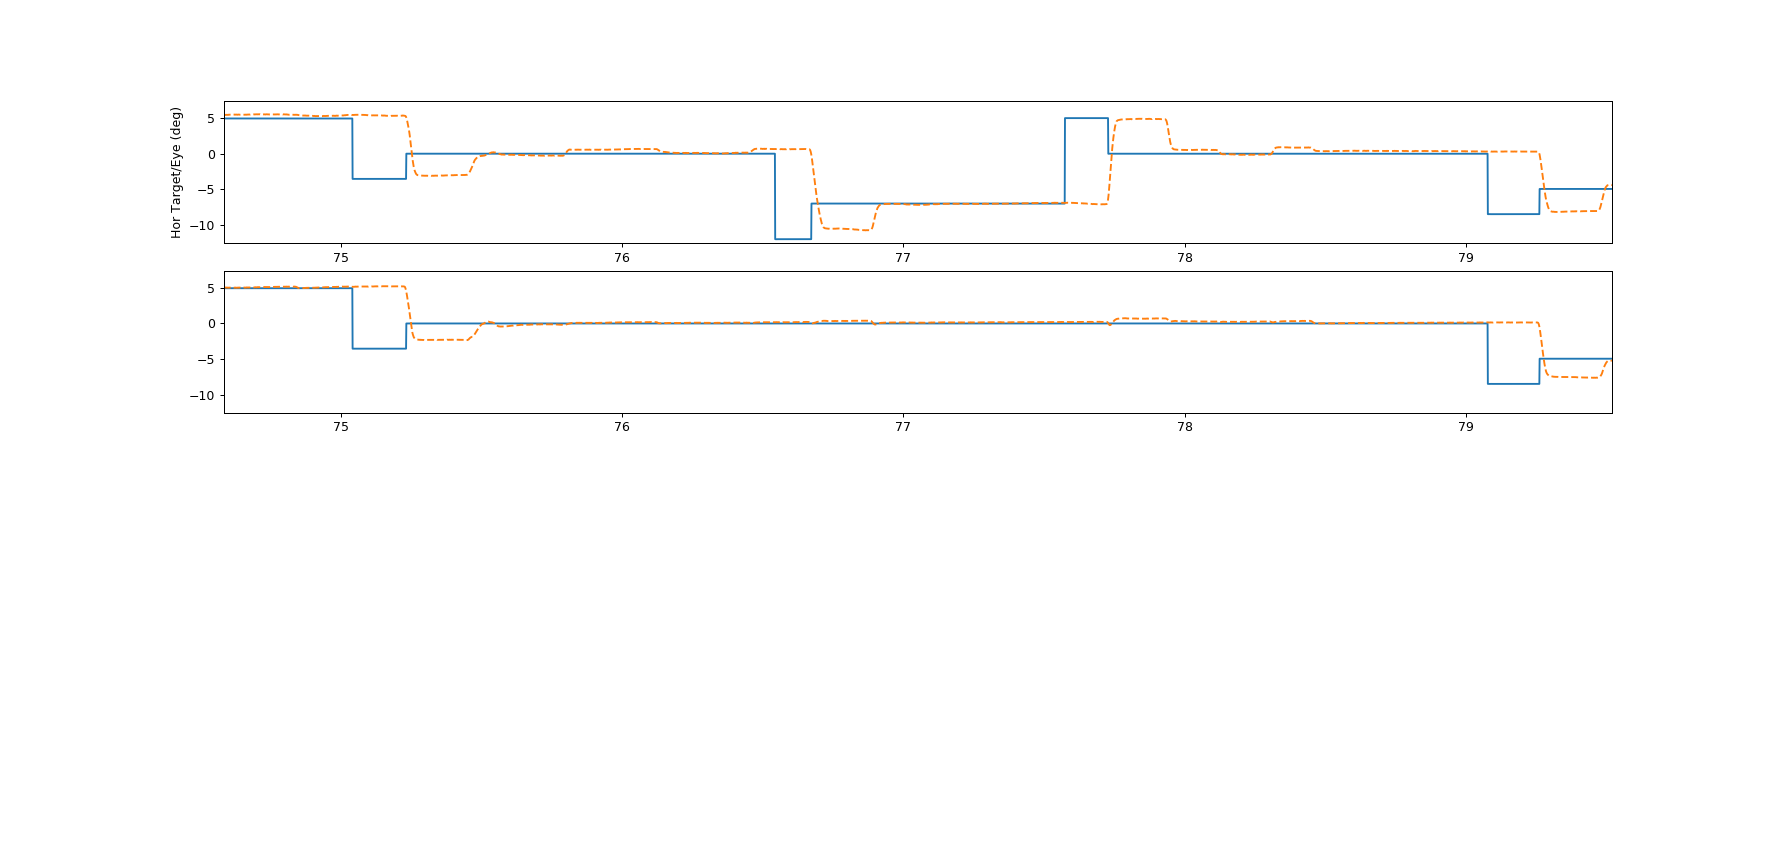

In [8]:
import gc
gc.collect()

plt.figure()
ax1 = plt.subplot(411)
plt.plot(t_HT, HT)
plt.plot(t_HT, HE, '--')
h = plt.ylabel('Hor Target/Eye (deg)')
# h.set_rotation(-45)
plt.subplot(412, sharex=ax1, sharey=ax1)
plt.plot(t_VT, VT)
plt.plot(t_VT, VE, '--')
# plt.ylabel('Ver Target/Eye (deg)')
# ax3 = plt.subplot(413, sharex=ax1)
# plt.plot(t_VT, mysess.T_v_filtered)
# plt.ylabel('Target Velocity (deg/s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)

# ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
# # plt.plot(t_VE, mysess.E_v_filtered)
# plt.ylabel('Eye Velocity (deg/s)')
# plt.xlabel('Time (s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(t_VE[mysess.saccade_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VE[mysess.saccade_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)

plt.show()



<IPython.core.display.Javascript object>


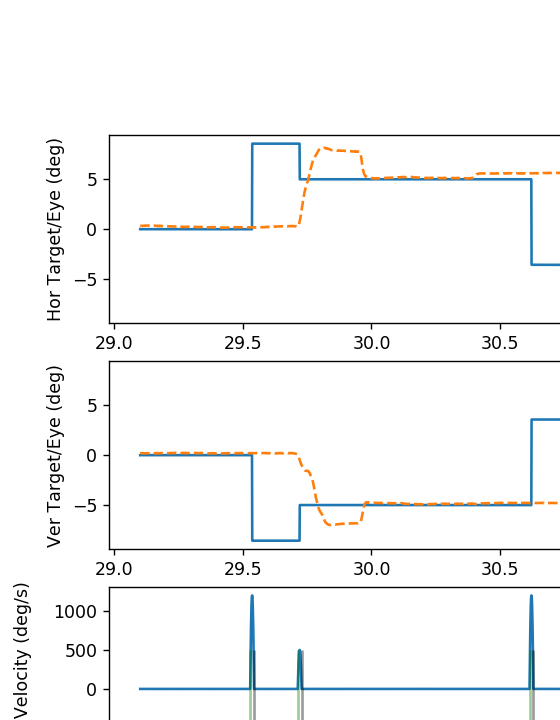

In [37]:
import numpy as np
t_start = 29.1 #s
t_end = 31.5 #s
plt.figure(figsize=(7,9))


import gc
gc.collect()


ax1 = plt.subplot(411)
t = np.where(np.logical_and((t_HT >= t_start) , (t_HT <= t_end)))
plt.plot(t_HT[t], HT[t])

t = np.where(np.logical_and((t_HE >= t_start) , (t_HE <= t_end)))
plt.plot(t_HE[t], HE[t], '--')
plt.ylabel('Hor Target/Eye (deg)')

plt.subplot(412, sharex=ax1, sharey=ax1)
t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
plt.plot(t_VT[t], VT[t])

t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
plt.plot(t_VE[t], VE[t], '--')
plt.ylabel('Ver Target/Eye (deg)')

ax3 = plt.subplot(413, sharex=ax1)
t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
plt.plot(t_VT[t], mysess.T_v_filtered[t])
plt.ylabel('Target Velocity (deg/s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_onsets][(t_VT[mysess.target_onsets] >= t_start)&(t_VT[mysess.target_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VT[mysess.target_offsets][(t_VT[mysess.target_offsets] >= t_start)&(t_VT[mysess.target_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
plt.plot(t_VE[t], mysess.E_v_filtered[t])
plt.ylabel('Eye Velocity (deg/s)')
plt.xlabel('Time (s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_onsets][(t_VE[mysess.saccade_onsets] >= t_start)&(t_VE[mysess.saccade_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(t_VE[mysess.saccade_offsets][(t_VE[mysess.saccade_offsets] >= t_start)&(t_VE[mysess.saccade_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

plt.show()


In [38]:
plt.savefig('../data/plots/sac_targ_detection.png')

In [33]:
# find inra-saccadic target jumps. For each saccade, check if that saccade is accompanied by a simultaneous target jump.
# If so, it is an intra-saccadic target_jump. 
# check 25 ms before and after the saccade onset and offset for the target jump onset and offset. if found, the target jump is intra-saccadic
import numpy as np
import quantities as pq
iss_range = pq.quantity.Quantity(0.025, 's')
iss_targets = []
saccades_with_no_iss_target = []
for i, (son, soff) in enumerate(zip(mysess.saccade_onset_times, mysess.saccade_offset_times)):
    iss_targets.append(np.where(np.logical_or(np.logical_and(mysess.target_onset_times < son + iss_range, 
                                                             mysess.target_onset_times > son - iss_range), 
                                              np.logical_and(mysess.target_offset_times < soff + iss_range, 
                                                             mysess.target_offset_times > soff - iss_range)))[0])
    if iss_targets[-1].size == 0:
        saccades_with_no_iss_target.append(i)
       
iss_targets = np.squeeze(np.array([isst for isst in iss_targets if isst.size != 0]))

non_iss_target_jumps = np.setdiff1d(np.arange(mysess.target_onset_times.size), iss_targets)

In [47]:
# deleting errors with magnitude less than 0.25 degrees

# to_delete = np.where(error_mag < 0.25)[0]
# error_dir = np.delete(error_dir, to_delete)
# soffs = np.delete(soffs, to_delete)
# error_mag = np.delete(error_mag, to_delete)


In [9]:
mysess._calc_error_vectors()

dir_bin_ind = mysess.bin_error_dirs()
mag_bin_ind = mysess.bin_error_mags()

In [18]:
import numpy as np
bins = np.arange(-180 + 22.5, 180, 45)
bin_ind = np.digitize(mysess.error_dir , bins, right=True)
np.unique(bin_ind)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
bin_number = 0
plt.figure()
plt.plot(mysess.saccade_offsets, mysess.error_mag, '.')
# plt.plot(mysess.saccade_offsets[dir_bin_ind == bin_number], mysess.error_mag[dir_bin_ind == bin_number], '.r')
# plt.plot(mysess.saccade_offsets[mag_bin_ind == 1], mysess.error_mag[mag_bin_ind == 1], '.g')

<IPython.core.display.Javascript object>

AttributeError: session instance has no attribute 'error_mag'

<IPython.core.display.Javascript object>


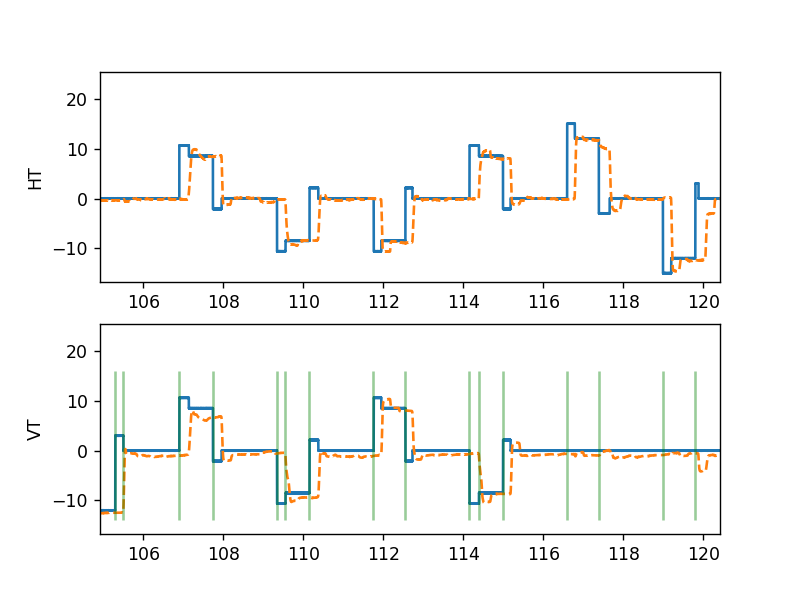

In [46]:
import gc
gc.collect()
plt.figure()
t_start = 0 #s
t_end = 200 #s

ax1 = plt.subplot(211)
t = np.where(np.logical_and((t_HT >= t_start) , (t_HT <= t_end)))
plt.plot(t_HT[t], HT[t])

t = np.where(np.logical_and((t_HE >= t_start) , (t_HE <= t_end)))
plt.plot(t_HE[t], HE[t], '--')
plt.ylabel('HT')

plt.subplot(212, sharex=ax1, sharey=ax1)
t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
plt.plot(t_VT[t], VT[t])

t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
plt.plot(t_VE[t], VE[t], '--')
# tons = mysess.target_onset_times[iss_targets][(mysess.target_onset_times[iss_targets] <= t_end) & (mysess.target_onset_times[iss_targets] >= t_start)]
# toffs = mysess.target_offset_times[iss_targets][(mysess.target_offset_times[iss_targets] <= t_end) & (mysess.target_offset_times[iss_targets] >= t_start)]
# plt.eventplot(tons, linelengths=30, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(toffs, linelengths=30, colors='r', zorder=10, alpha = 0.4)

tons = mysess.target_onset_times[non_iss_target_jumps][(mysess.target_onset_times[non_iss_target_jumps] <= t_end) & (mysess.target_onset_times[non_iss_target_jumps] >= t_start)]
toffs = mysess.target_offset_times[non_iss_target_jumps][(mysess.target_offset_times[non_iss_target_jumps] <= t_end) & (mysess.target_offset_times[non_iss_target_jumps] >= t_start)]
plt.eventplot(tons, linelengths=30, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(toffs, linelengths=30, colors='b', zorder=10, alpha = 0.4)

plt.ylabel('VT')


# ax3 = plt.subplot(413, sharex=ax1)
# t = np.where(np.logical_and((t_VT >= t_start) , (t_VT <= t_end)))
# plt.plot(t_VT[t], mysess.T_v_filtered[t])
# plt.ylabel('T_v')
# # plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_onsets][(t_VT[mysess.target_onsets] >= t_start)&(t_VT[mysess.target_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_offsets][(t_VT[mysess.target_offsets] >= t_start)&(t_VT[mysess.target_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

# ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
# t = np.where(np.logical_and((t_VE >= t_start) , (t_VE <= t_end)))
# plt.plot(t_VE[t], mysess.E_v_filtered[t])
# plt.ylabel('E_v')
# # plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
# plt.eventplot(t_VE[mysess.saccade_onsets][(t_VE[mysess.saccade_onsets] >= t_start)&(t_VE[mysess.saccade_onsets] <= t_end)], linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VE[mysess.saccade_offsets][(t_VE[mysess.saccade_offsets] >= t_start)&(t_VE[mysess.saccade_offsets] <= t_end)], linelengths=1000, colors='k', zorder=10, alpha = 0.4)

plt.show()
